In [6]:
#NLP sobre IMDB Dataset of 50K Movie Reviews
# https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

import pandas as pd

#importing dataset
# Usar on_bad_lines para manejar líneas mal formadas
#df = pd.read_csv('IMDB Dataset.csv', on_bad_lines='skip', delimiter=',', quotechar='"')
df = pd.read_csv('IMDB Dataset.csv', delimiter=',', quotechar='"', on_bad_lines='skip')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [7]:
#Checking Dataset Description
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [8]:
#Sentiment count
print("Total :\n",df['sentiment'].value_counts())

Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [9]:
review = []
sentences = list(df['review'])
for sen in sentences:
    review.append(sen)

In [10]:
#Creación de etiquetas
import numpy as np

labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [11]:
#División de datos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20, random_state=42)

In [12]:
# Preparar los datos
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

In [13]:
# Parámetros de configuración
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

In [14]:
pip install tensorflow

In [15]:
#tokenización y acolchado de secuencias

import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#initialize the tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

#Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

#Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

#Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

#Construcción del modelo
model = Sequential([
    Embedding(vocab_size, embedding_dim),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [17]:
#Construcción y entrenamiento del modelo
#setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6997 - loss: 0.5323 - val_accuracy: 0.8391 - val_loss: 0.3539
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9093 - loss: 0.2314 - val_accuracy: 0.8269 - val_loss: 0.4143
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9785 - loss: 0.0697 - val_accuracy: 0.8195 - val_loss: 0.6226
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9943 - loss: 0.0199 - val_accuracy: 0.8170 - val_loss: 0.9068
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9982 - loss: 0.0066 - val_accuracy: 0.8166 - val_loss: 1.0548
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9970 - loss: 0.0093 - val_accuracy: 0.8128 - val_loss: 1.1495
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9951 - loss: 0.0135 - val_accuracy: 0.8124 - val_loss: 1.2455
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9977 - loss: 0.0070

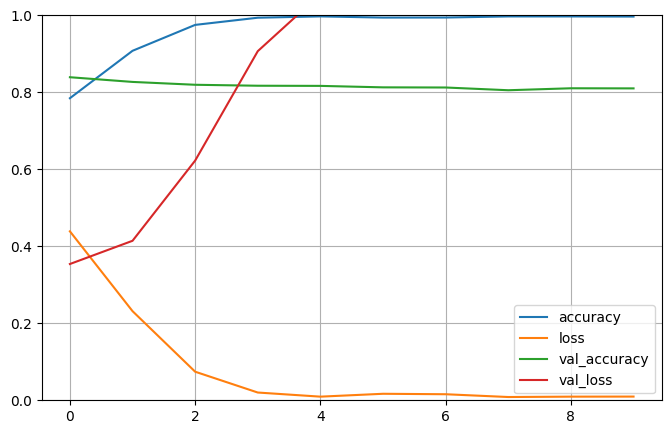

In [18]:
#train the model
import matplotlib.pyplot as plt

num_epochs = 10

history = model.fit(padded,
                    train_labels,
                    epochs=num_epochs,
                    validation_data=(test_padded, test_labels))

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


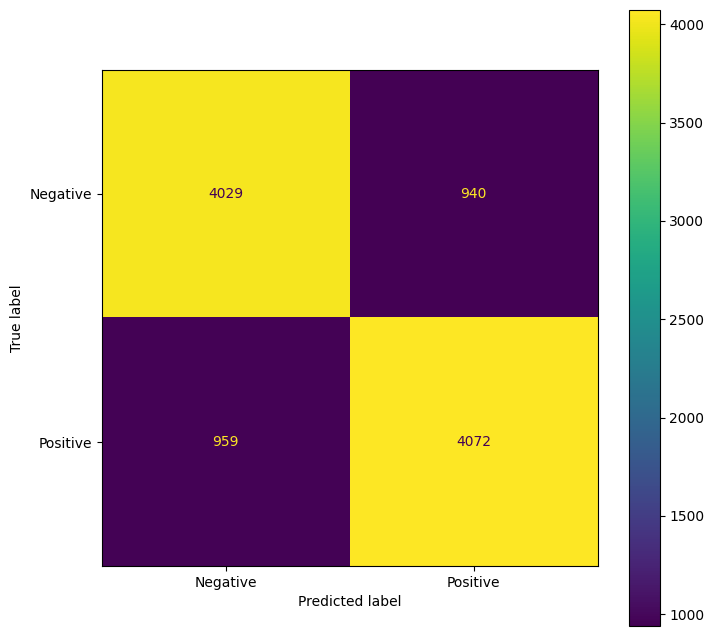

Accuracy: 0.81
F1 Score: 0.81


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score

# Obtener las predicciones del modelo sobre el conjunto de prueba
predictions = model.predict(test_padded)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Calcular la accuracy
accuracy = accuracy_score(test_labels, predicted_labels)

# Calcular el F1 score
f1 = f1_score(test_labels, predicted_labels)

# Crear la matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax)
plt.show()

# Mostrar la accuracy y el F1 score
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


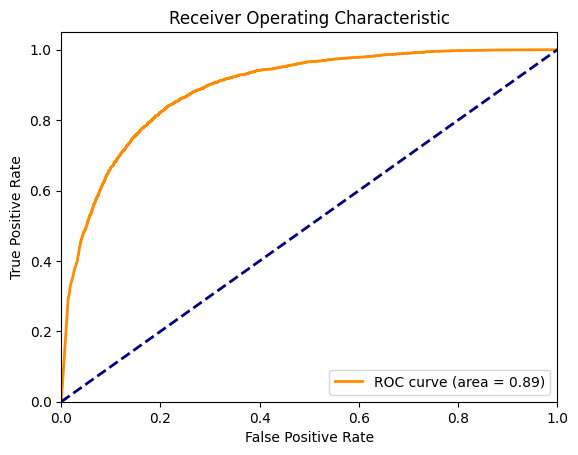

AUC: 0.89


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de las predicciones
y_prob = model.predict(test_padded).ravel()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(test_labels, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


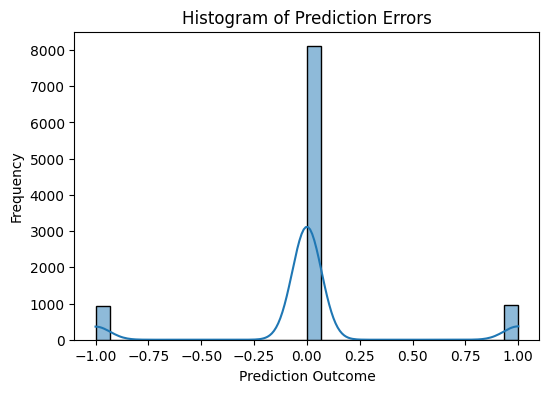

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las predicciones del modelo
y_pred = (model.predict(test_padded) > 0.5).astype("int32")

# Calcular los errores como la diferencia entre las etiquetas verdaderas y las predicciones
errors = np.array(test_labels) - np.array(y_pred).flatten()

# Crear el histograma de errores con barras más delgadas
plt.figure(figsize=(6, 4))
sns.histplot(errors, kde=True, bins=30)
plt.xlabel('Prediction Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()

# Preguntas

1. ¿Qué hace el código en general?

El código entrena un modelo de red neuronal en un conjunto de datos de texto previamente preparado y luego grafica el historial de entrenamiento, mostrando la evolución de las métricas de pérdida y precisión durante las épocas de entrenamiento.


3. ¿Por qué se utilizan los parámetros específicos en cada función (por ejemplo, num_words, embedding_dim, input_legth, loss, optimizer)?

Cada parámetro juega un papel específico en la preparación y ajuste del modelo.

* num_words (en Tokenizer)

Propósito: Limita el tamaño del vocabulario del Tokenizer a las num_words palabras más frecuentes.

Uso: Al especificar este parámetro, decides cuántas palabras quieres que el modelo considere. Esto ayuda a reducir la complejidad y el tamaño del modelo al ignorar palabras menos frecuentes, que podrían ser irrelevantes para la tarea o introducir ruido.

* embedding_dim (en la capa Embedding)

Propósito: Define la dimensión del espacio de representación en el que se proyectan las palabras.

Uso: Determina el tamaño de los vectores de embeddings que representan las palabras. Un embedding_dim mayor puede capturar relaciones más complejas entre palabras pero a costa de mayor uso de memoria y procesamiento. Un valor más pequeño puede ser suficiente para tareas más simples.

* input_length (en la capa Embedding)

Propósito: Especifica la longitud fija de las secuencias de entrada.

Uso: Define el tamaño de las secuencias de texto que el modelo aceptará. Esto es crucial para el padding y truncation de las secuencias para que todas tengan la misma longitud. Esto asegura que el modelo pueda procesar las entradas de manera uniforme.

* loss (en model.compile)

Propósito: Especifica la función de pérdida que el modelo tratará de minimizar durante el entrenamiento.

Uso: La función de pérdida mide la diferencia entre las predicciones del modelo y las etiquetas verdaderas. Elegir una función de pérdida adecuada es crucial para que el modelo aprenda correctamente. Por ejemplo, para clasificación binaria se puede usar binary_crossentropy, mientras que para clasificación múltiple se puede usar categorical_crossentropy.

* optimizer (en model.compile)

Propósito: Define el algoritmo que se usará para ajustar los pesos del modelo durante el entrenamiento.

Uso: El optimizador determina cómo se actualizarán los pesos del modelo en función del gradiente calculado. Diferentes optimizadores (como SGD, Adam, RMSprop) tienen diferentes estrategias para actualizar los pesos y pueden afectar el rendimiento y la convergencia del modelo.


4. ¿Cuál es la diferencia entre train_sentences y test_sentences?

* train_sentences: Son las oraciones o textos que se utilizan para entrenar el modelo. Estos datos son parte del conjunto de entrenamiento y se usan para ajustar los parámetros del modelo durante el proceso de entrenamiento.

* test_sentences: Son las oraciones o textos que se utilizan para evaluar el rendimiento del modelo después de que ha sido entrenado. Estos datos forman parte del conjunto de prueba y se usan para verificar qué tan bien el modelo generaliza a datos no vistos durante el entrenamiento.

En resumen, train_sentences se usa para ajustar el modelo, mientras que test_sentences se usa para evaluar su desempeño.


5. ¿Qué significa vocab_size, max_length; embedding_dim y oov_token?

* vocab_size: Es el tamaño del vocabulario, que representa el número total de palabras únicas que el modelo puede manejar. En el contexto del Tokenizer de Keras, esto es el número máximo de palabras que se incluirán en el diccionario de palabras del modelo. Palabras fuera de este rango se ignorarán.

* max_length: Es la longitud máxima de las secuencias de texto que el modelo aceptará. En el proceso de padding, las secuencias de texto se ajustan a esta longitud. Si una secuencia es más corta, se rellenará con ceros; si es más larga, se truncará para que encaje en esta longitud.

* *embedding_dim: Es la dimensión del espacio de representación de los vectores de palabras. Especifica el tamaño de los vectores en el espacio de embeddings. Un valor mayor significa vectores más ricos, pero también más costosos computacionalmente. Generalmente, se elige basado en el tamaño del vocabulario y la complejidad del problema.

* oov_token: Significa "out-of-vocabulary token" (token fuera del vocabulario). Es un token especial que se utiliza para representar palabras que no están en el vocabulario del modelo. Esto es útil para manejar palabras desconocidas o raras que no se encontraban en el conjunto de entrenamiento.

Estos parámetros son importantes para la preparación y el procesamiento de datos de texto antes de entrenar modelos de aprendizaje automático, y cada uno cumple una función específica en la construcción y el ajuste del modelo.